In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("Resources/Stoke_analysis1.csv")
# Top 5 records:
dataset.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,smoking,bmi,cholestrol
0,61,1.0,0,1.0,-1,124,80,77,0,22,200
1,75,1.0,0,1.0,-1,123,82,79,0,20,208
2,73,0.0,0,1.0,-1,121,83,83,0,20,208
3,63,0.0,0,1.0,-1,120,85,105,0,20,210
4,23,1.0,0,1.0,-1,126,81,89,0,22,201


# Attribute Information
id: unique identifier
gender: "Male", "Female"

age: age of the patient

Systolic: blood pressure of patient
Distolic: blood pressure of patient

Paralysis: effects of a stroke 

Nhiss: As a general rule, a score over 16 predicts a strong probability of patient death, while a score of 6 or lower indicates a strong possibility for a good recovery. Each 1-point increase on the scale lowers the possibility of a positive outcome for the patient by 17 percent.

mRs: (mRS) assesses disability in patients who have suffered a stroke and is compared over time to check for recovery and degree of continued disability. A score of 0 is no disability, 5 is disability requiring constant care for all needs; 6 is death.

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking: 0 none, 1 Yes



In [4]:
# Shape of dataset:
dataset.shape

(4798, 11)

In [5]:
dataset.isnull().sum()

age                 0
gender            248
nhiss               0
severity_level    248
mrs                 0
systolic            0
distolic            0
glucose             0
smoking             0
bmi                 0
cholestrol          0
dtype: int64

In [6]:
# Description:
dataset.describe()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,smoking,bmi,cholestrol
count,4798.000000,4550.000000,4798.000000,4550.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000
mean,47.116090,0.351209,18.124427,2.829890,3.674239,153.091705,103.655065,225.846186,0.884744,33.739475,217.531055
std,23.690637,0.477401,11.274141,0.937991,1.872073,24.927477,18.344127,56.119071,0.903432,6.231687,20.268753
min,1.000000,0.000000,0.000000,1.000000,-1.000000,100.000000,59.000000,70.000000,0.000000,18.000000,160.000000
25%,28.000000,0.000000,10.000000,2.000000,2.000000,132.000000,91.000000,203.000000,0.000000,29.000000,205.000000
50%,49.000000,0.000000,18.000000,3.000000,4.000000,154.000000,104.000000,239.000000,1.000000,34.000000,219.000000
75%,66.000000,1.000000,25.000000,4.000000,5.000000,175.000000,118.000000,268.000000,2.000000,38.000000,234.000000
max,90.000000,1.000000,45.000000,4.000000,6.000000,195.000000,135.000000,295.000000,3.000000,45.000000,253.000000


In [7]:
# Datatypes:
dataset.dtypes

age                 int64
gender            float64
nhiss               int64
severity_level    float64
mrs                 int64
systolic            int64
distolic            int64
glucose             int64
smoking             int64
bmi                 int64
cholestrol          int64
dtype: object

In [8]:
# Severity Level
dataset['severity_level'].value_counts()

3.0    1964
4.0    1164
2.0     906
1.0     516
Name: severity_level, dtype: int64

In [61]:
# Severity Level:
print("No Stroke: ", dataset['severity_level'].value_counts()[1])
print("Mild Stroke: ", dataset['severity_level'].value_counts()[2])
print("Moderate Stroke: ", dataset['severity_level'].value_counts()[3])
print("Sever Stroke: ", dataset['severity_level'].value_counts()[4.0])

No Stroke:  516
Mild Stroke:  906
Moderate Stroke:  1964
Sever Stroke:  1164


In [62]:
# Gender
dataset['gender'].value_counts()

0.0    2952
1.0    1598
Name: gender, dtype: int64

In [63]:
# Gender:
print("Male    : ", dataset['gender'].value_counts()[0])
print("female  : ", dataset['gender'].value_counts()[1])

Male    :  2952
female  :  1598


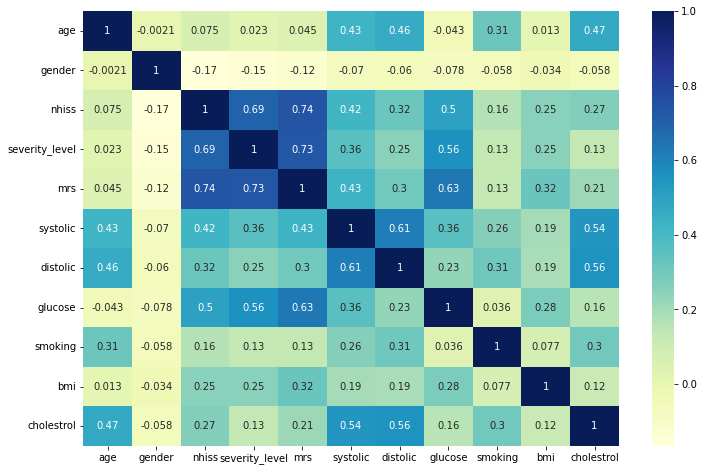

In [64]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [65]:
dataset.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,smoking,bmi,cholestrol
0,61,1.0,0,1.0,-1,124,80,77,0,22,200
1,75,1.0,0,1.0,-1,123,82,79,0,20,208
2,73,0.0,0,1.0,-1,121,83,83,0,20,208
3,63,0.0,0,1.0,-1,120,85,105,0,20,210
4,23,1.0,0,1.0,-1,126,81,89,0,22,201


In [66]:
# Dependent & Independent Feature:
X = dataset.iloc[:, :11]
y = dataset.iloc[:, 10]

In [67]:
X.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,smoking,bmi,cholestrol
0,61,1.0,0,1.0,-1,124,80,77,0,22,200
1,75,1.0,0,1.0,-1,123,82,79,0,20,208
2,73,0.0,0,1.0,-1,121,83,83,0,20,208
3,63,0.0,0,1.0,-1,120,85,105,0,20,210
4,23,1.0,0,1.0,-1,126,81,89,0,22,201


In [68]:
X = pd.get_dummies(X, drop_first=True) 

In [69]:
X.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,smoking,bmi,cholestrol
0,61,1.0,0,1.0,-1,124,80,77,0,22,200
1,75,1.0,0,1.0,-1,123,82,79,0,20,208
2,73,0.0,0,1.0,-1,121,83,83,0,20,208
3,63,0.0,0,1.0,-1,120,85,105,0,20,210
4,23,1.0,0,1.0,-1,126,81,89,0,22,201


In [70]:
X.columns

Index(['age', 'gender', 'nhiss', 'severity_level', 'mrs', 'systolic',
       'distolic', 'glucose', 'smoking', 'bmi', 'cholestrol'],
      dtype='object')

In [71]:
X = X[['age', 'gender', 'nhiss', 'severity_level', 'mrs', 'systolic',
       'distolic', 'glucose', 'smoking', 'bmi', 'cholestrol']]

In [72]:
X.head()

,age,gender,nhiss,severity_level,mrs,systolic,distolic,glucose,smoking,bmi,cholestrol
0,61,1.0,0,1.0,-1,124,80,77,0,22,200
1,75,1.0,0,1.0,-1,123,82,79,0,20,208
2,73,0.0,0,1.0,-1,121,83,83,0,20,208
3,63,0.0,0,1.0,-1,120,85,105,0,20,210
4,23,1.0,0,1.0,-1,126,81,89,0,22,201


In [73]:
# Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [74]:
print(X_train.shape)
print(X_test.shape)

(3838, 11)
(960, 11)


In [75]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [76]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [77]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

In [60]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').